In [94]:
#Load the data as a pandas dataframe
pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [95]:
#Load the data as a pandas dataframe
import pandas as pd

# Specify the file path
file_path = 'C:\\Users\\Ali\\Medical_insurance.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [97]:
#Clean the data, taking care of the blank entries

try:
    # Load the data into a DataFrame
    df = pd.read_csv(file_path)

    # Handle missing values (e.g., replace with "Unknown")
    df = df.fillna("Unknown")

    # Save the cleaned data to a new CSV file
    cleaned_file_path = r'C:\NPFiles\practice files\Cleaned_Medical_insurance.csv'
    df.to_csv(cleaned_file_path, index=False)

    print("Data cleaning and saving completed successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")



Data cleaning and saving completed successfully.


In [98]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [100]:
#Update data types of any object columns
# Convert 'sex' and 'smoker' to binary values
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# One-hot encode 'region' column
df = pd.get_dummies(df, columns=['region'])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               2772 non-null   int64  
 1   sex               2772 non-null   int64  
 2   bmi               2772 non-null   float64
 3   children          2772 non-null   int64  
 4   smoker            2772 non-null   int64  
 5   charges           2772 non-null   float64
 6   region_northeast  2772 non-null   bool   
 7   region_northwest  2772 non-null   bool   
 8   region_southeast  2772 non-null   bool   
 9   region_southwest  2772 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 140.9 KB
None


In [101]:
#search for NaN (Not-a-Number) values
#df.isna()  # or df.isnull()

#or use the following 2 lines
#has_nan = df.isna().any()
#nan_count = df.isna().sum()

any_nan = df.isna().any().any()
print (any_nan)

False


In [103]:
# counts the number of instances of 'nan'.
total_nan_count = df.isna().sum().sum()
print(total_nan_count)

0


In [104]:
# contain True where the DataFrame has BLANK entries and False otherwise.
df.isnull()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2767,False,False,False,False,False,False,False,False,False,False
2768,False,False,False,False,False,False,False,False,False,False
2769,False,False,False,False,False,False,False,False,False,False
2770,False,False,False,False,False,False,False,False,False,False


In [105]:
#is_not_blank will contain True where the DataFrame has non-blank entries and False where there are blank entries (NaN).
is_not_blank = df.notna()
print (df.notna())

       age   sex   bmi  children  smoker  charges  region_northeast  \
0     True  True  True      True    True     True              True   
1     True  True  True      True    True     True              True   
2     True  True  True      True    True     True              True   
3     True  True  True      True    True     True              True   
4     True  True  True      True    True     True              True   
...    ...   ...   ...       ...     ...      ...               ...   
2767  True  True  True      True    True     True              True   
2768  True  True  True      True    True     True              True   
2769  True  True  True      True    True     True              True   
2770  True  True  True      True    True     True              True   
2771  True  True  True      True    True     True              True   

      region_northwest  region_southeast  region_southwest  
0                 True              True              True  
1                 True   

In [106]:
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Get information about the dataset, including data types and missing values

   age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061             False   
4   32    1  28.880         0       0   3866.85520             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age          

In [107]:
# Run exploratory data analysis and identify the attributes that most affect the charges
# Summary statistics of numerical attributes
print(df.describe())  

               age          sex          bmi     children       smoker  \
count  2772.000000  2772.000000  2772.000000  2772.000000  2772.000000   
mean     39.109668     0.507215    30.701349     1.101732     0.203463   
std      14.081459     0.500038     6.129449     1.214806     0.402647   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      26.000000     0.000000    26.220000     0.000000     0.000000   
50%      39.000000     1.000000    30.447500     1.000000     0.000000   
75%      51.000000     1.000000    34.770000     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            charges  
count   2772.000000  
mean   13261.369959  
std    12151.768945  
min     1121.873900  
25%     4687.797000  
50%     9333.014350  
75%    16577.779500  
max    63770.428010  


(0.0, 66902.8557155)

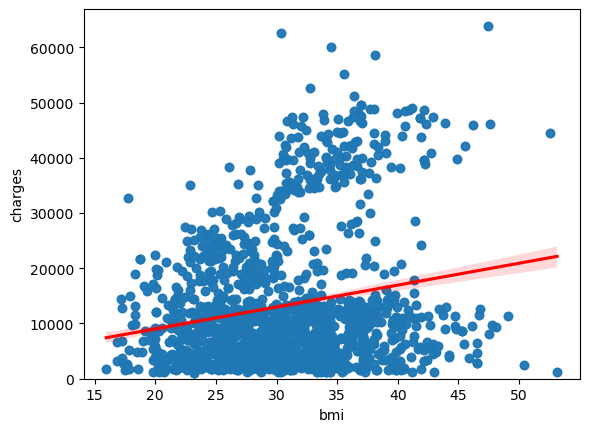

In [108]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

(0.0, 66902.8557155)

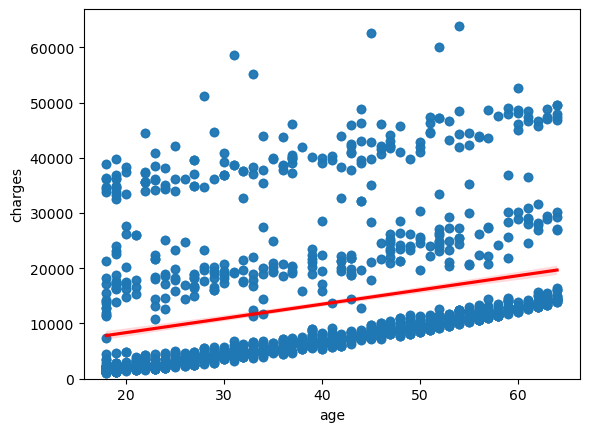

In [109]:
sns.regplot(x="age", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

(0.0, 66902.8557155)

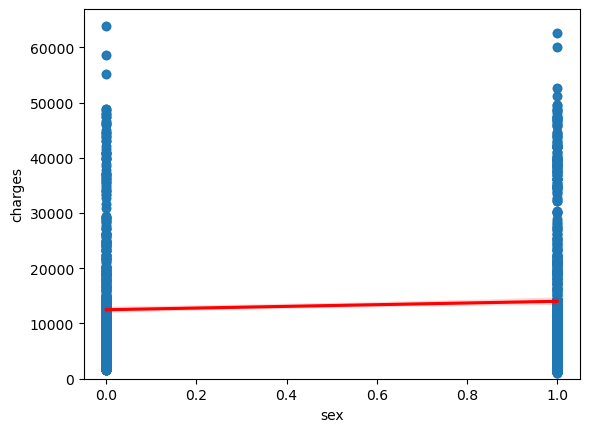

In [110]:
sns.regplot(x="sex", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

(0.0, 66902.8557155)

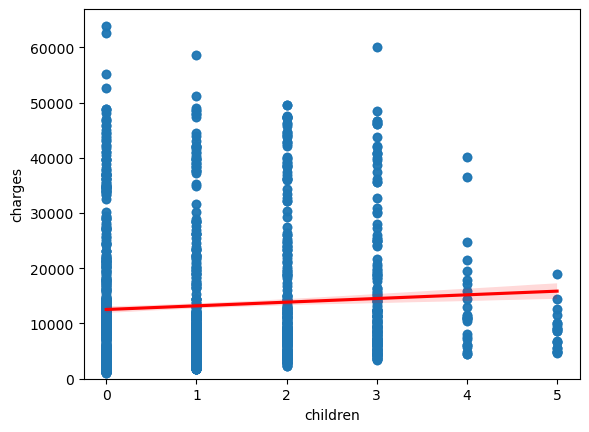

In [111]:
sns.regplot(x="children", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

(0.0, 66902.8557155)

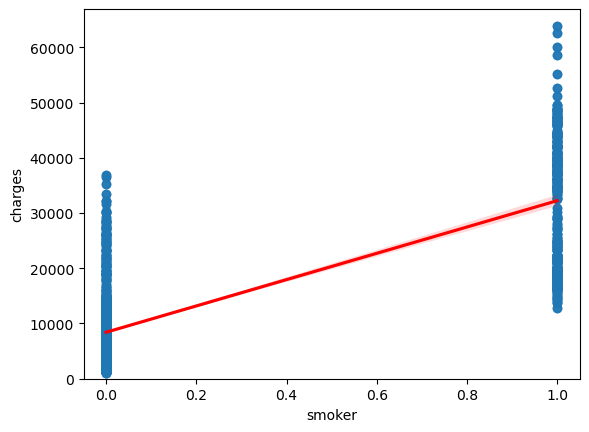

In [112]:
sns.regplot(x="smoker", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

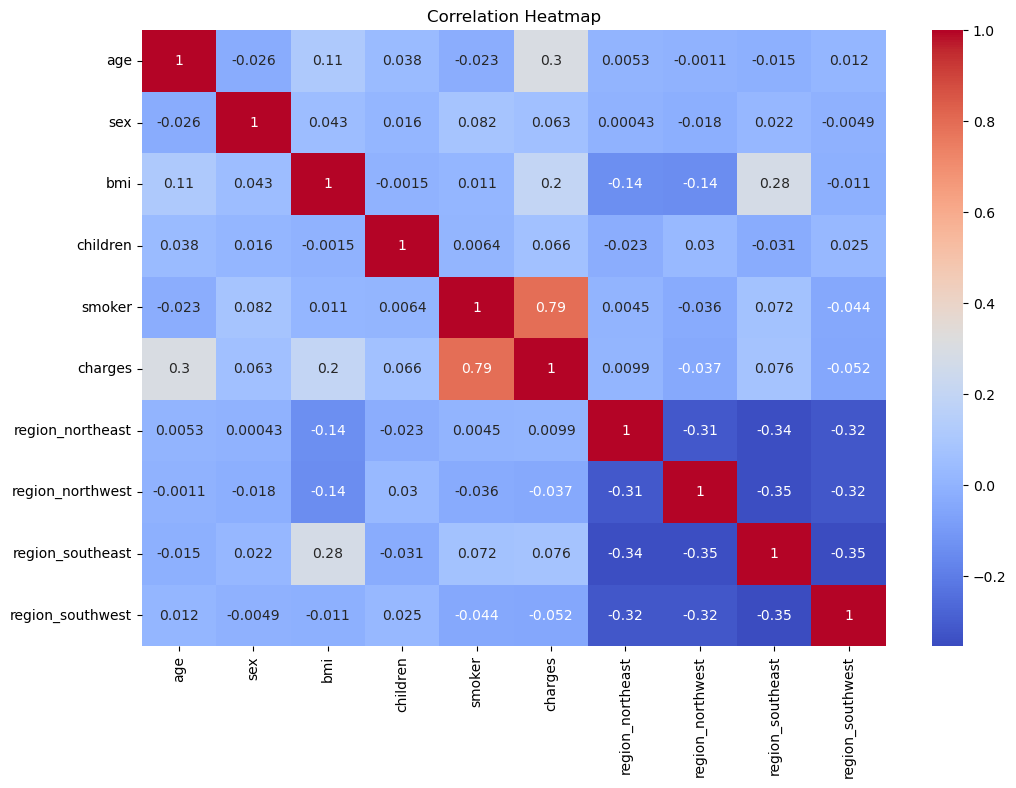

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


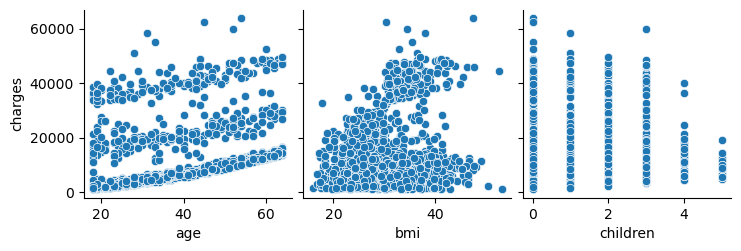

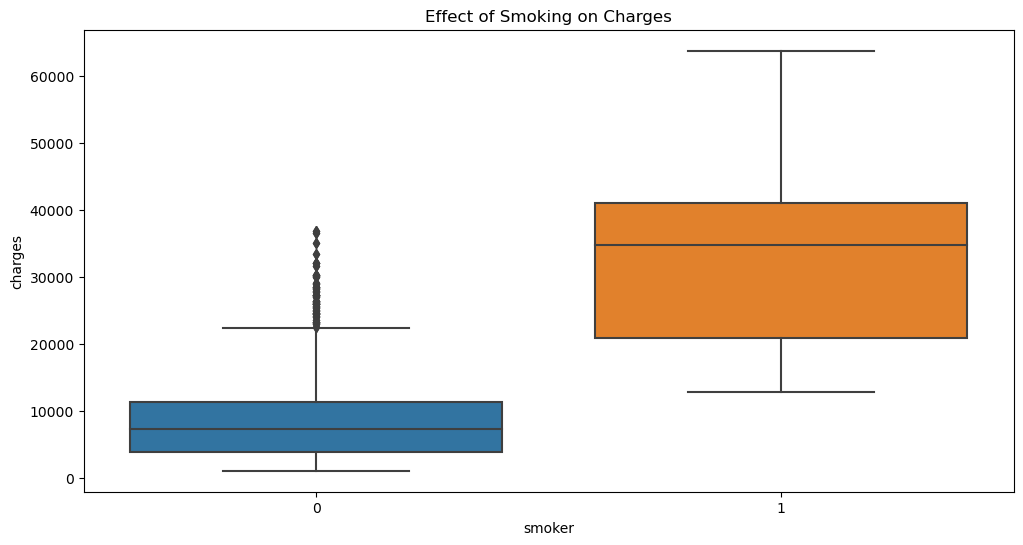

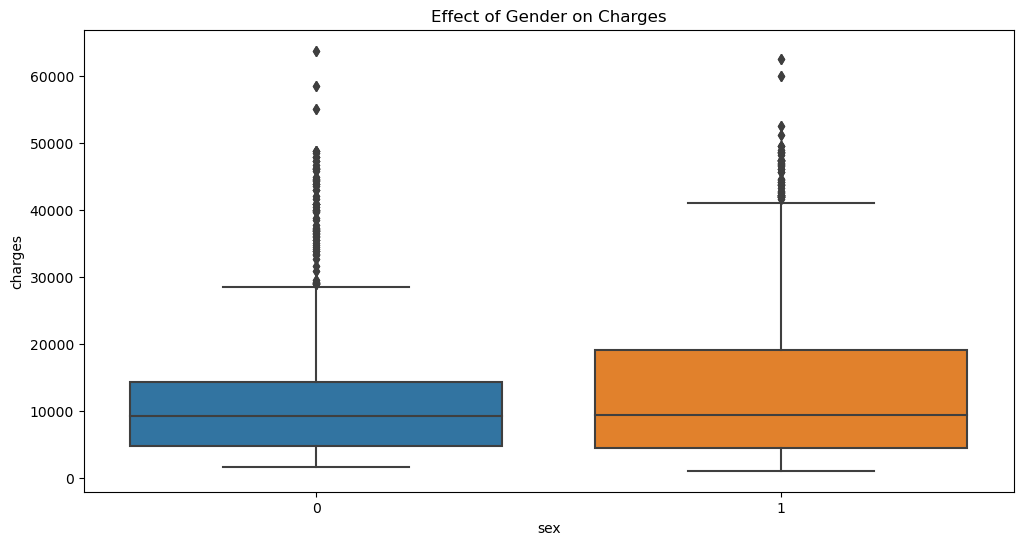

In [114]:
# Pairwise Correlation: Calculate and visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatterplots
# Create scatterplots to visualize relationships between numerical attributes and 'charges'
sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars=['charges'], kind='scatter')
plt.show()

# Categorical Attributes vs. 'charges'
# Create boxplots to visualize the effect of categorical attributes on 'charges'
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Effect of Smoking on Charges')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Effect of Gender on Charges')
plt.show()

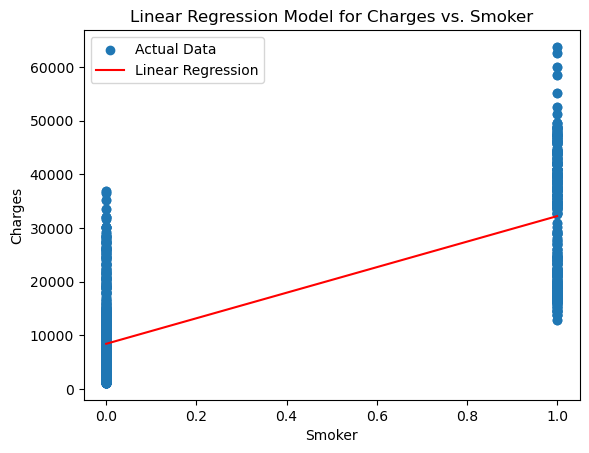

Linear Regression Coefficients: [23805.26535248]
Linear Regression Intercept: 8417.874411140407


In [120]:
#single variable Linear Regression models with predictions
# Assuming 'smoker' is the feature to predict 'charges'
X = df[['smoker']]
y = df['charges']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predicted_charges = model.predict(X)

# Plot the data points and the linear regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, predicted_charges, color='red', label='Linear Regression')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.legend()
plt.title('Linear Regression Model for Charges vs. Smoker')
plt.show()

# Print the coefficients and intercept of the model
print('Linear Regression Coefficients:', model.coef_)
print('Linear Regression Intercept:', model.intercept_)

Linear Regression Coefficients: [  256.6182493    311.82059256   505.06135259   -56.53583572
 23955.79834887]
Linear Regression Intercept: -11750.087206178865


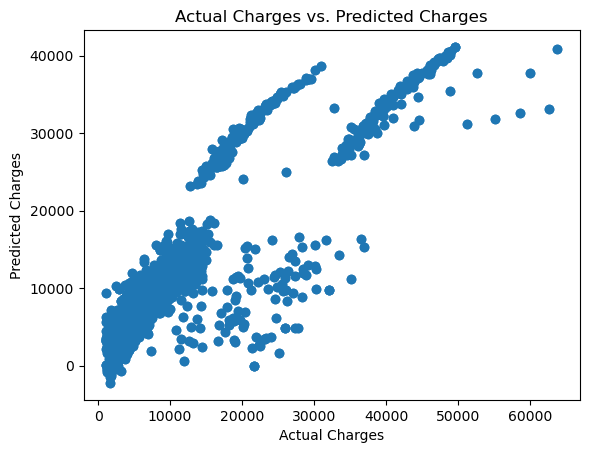

In [122]:
# Multiple Regression Analysis
# Perform multiple linear regression to quantify the impact of all features on 'charges'
from sklearn.linear_model import LinearRegression

X = df[['age', 'bmi', 'children', 'sex', 'smoker']]
y = df['charges']

model_multi = LinearRegression()
model_multi.fit(X, y)

# Make predictions
predicted_charges = model_multi.predict(X)

# Print the coefficients and intercept of the model
print('Linear Regression Coefficients:', model_multi.coef_)
print('Linear Regression Intercept:', model_multi.intercept_)

# Plot the predicted charges vs. actual charges
plt.scatter(y, predicted_charges)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs. Predicted Charges')
plt.show()

In [123]:
# Use Ridge regression to refine the performance of Linear regression models.

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train, y_train)

# Make predictions
predicted_charges_ridge = ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, predicted_charges_ridge)
print('Mean Squared Error (Ridge):', mse)


Mean Squared Error (Ridge): 40104990.95076397


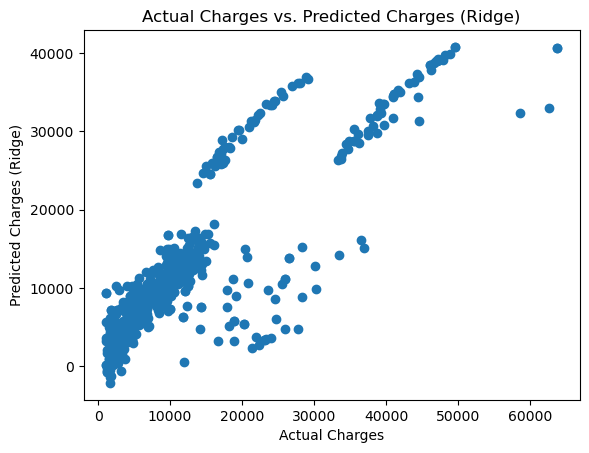

Linear Regression Coefficients: [  256.6182493    311.82059256   505.06135259   -56.53583572
 23955.79834887]
Linear Regression Intercept: -11750.087206178865


In [125]:
import matplotlib.pyplot as plt

# Plot the predicted charges vs. actual charges for Ridge regression
plt.scatter(y_test, predicted_charges_ridge)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges (Ridge)')
plt.title('Actual Charges vs. Predicted Charges (Ridge)')
plt.show()
# Print the coefficients and intercept of the model
print('Linear Regression Coefficients:', model_multi.coef_)
print('Linear Regression Intercept:', model_multi.intercept_)

In [127]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               2772 non-null   int64  
 1   sex               2772 non-null   int64  
 2   bmi               2772 non-null   float64
 3   children          2772 non-null   int64  
 4   smoker            2772 non-null   int64  
 5   charges           2772 non-null   float64
 6   region_northeast  2772 non-null   bool   
 7   region_northwest  2772 non-null   bool   
 8   region_southeast  2772 non-null   bool   
 9   region_southwest  2772 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 140.9 KB


,age,sex,bmi,children,smoker,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.507215,30.701349,1.101732,0.203463,13261.369959
std,14.081459,0.500038,6.129449,1.214806,0.402647,12151.768945
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,0.000000,4687.797000
50%,39.000000,1.000000,30.447500,1.000000,0.000000,9333.014350
75%,51.000000,1.000000,34.770000,2.000000,0.000000,16577.779500
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010
